In [2]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from torch.autograd import Variable 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob, os
import seaborn as sns

# 1. Dataset

## 1.1 load dataset

In [8]:
data = pd.read_csv("./C5-C129/data_frames_labeled/effected_all_frames_labeled.csv")
data

,index,0,1,2,3,4,5,6,7,8,...,532,533,534,535,536,537,538,539,540,action mode
0,C27_00,0.027233,0.027539,0.027299,0.027645,0.027516,0.027216,0.026913,0.027065,0.027211,...,0.035469,0.033350,0.032376,0.031603,0.030481,0.030428,0.033246,0.033398,0.035958,GABAA allosteric antagonist
1,C27_01,0.034097,0.033132,0.033106,0.034465,0.033873,0.035325,0.035155,0.035615,0.033612,...,0.033993,0.033235,0.036673,0.035707,0.032408,0.034262,0.033855,0.035080,0.034525,GABAA allosteric antagonist
2,C27_02,0.022425,0.022276,0.022578,0.021829,0.021994,0.021960,0.021944,0.022157,0.022356,...,0.007974,0.008208,0.008466,0.008117,0.007963,0.008235,0.008228,0.008159,0.008054,GABAA allosteric antagonist
3,C27_03,0.116440,0.098673,0.095889,0.085707,0.083466,0.076944,0.073436,0.067148,0.063102,...,0.020565,0.020161,0.021047,0.021765,0.021712,0.022141,0.020585,0.020312,0.020073,GABAA allosteric antagonist
4,C27_04,0.034495,0.034277,0.032969,0.033982,0.032666,0.032558,0.032460,0.034080,0.033181,...,0.035469,0.033350,0.032376,0.031603,0.030481,0.030428,0.033246,0.033398,0.035958,GABAA allosteric antagonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,WT_Control_584,0.012645,0.012774,0.012832,0.012799,0.012655,0.012602,0.012633,0.012648,0.012643,...,0.012822,0.012893,0.012789,0.012867,0.012767,0.012748,0.012829,0.012829,0.012859,WT_control
4799,WT_Control_585,0.023257,0.022263,0.022948,0.021674,0.023818,0.023273,0.022829,0.021736,0.022251,...,0.023851,0.022643,0.023834,0.022680,0.023417,0.023315,0.023172,0.022639,0.021779,WT_control
4800,WT_Control_586,0.027347,0.026401,0.025863,0.025242,0.025504,0.025884,0.025644,0.025481,0.025876,...,0.023123,0.023913,0.025340,0.025306,0.023730,0.024275,0.023605,0.022926,0.022167,WT_control
4801,WT_Control_587,0.024743,0.024200,0.024444,0.023782,0.025545,0.025843,0.025644,0.024599,0.024149,...,0.024652,0.028002,0.025262,0.028470,0.026199,0.025387,0.024102,0.028028,0.025369,WT_control


In [4]:
X = data.iloc[:, 1:-1]
#data_array = 
X

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
0,0.027233,0.027539,0.027299,0.027645,0.027516,0.027216,0.026913,0.027065,0.027211,0.027248,...,0.035112,0.035469,0.033350,0.032376,0.031603,0.030481,0.030428,0.033246,0.033398,0.035958
1,0.034097,0.033132,0.033106,0.034465,0.033873,0.035325,0.035155,0.035615,0.033612,0.034037,...,0.034600,0.033993,0.033235,0.036673,0.035707,0.032408,0.034262,0.033855,0.035080,0.034525
2,0.022425,0.022276,0.022578,0.021829,0.021994,0.021960,0.021944,0.022157,0.022356,0.021943,...,0.008156,0.007974,0.008208,0.008466,0.008117,0.007963,0.008235,0.008228,0.008159,0.008054
3,0.116440,0.098673,0.095889,0.085707,0.083466,0.076944,0.073436,0.067148,0.063102,0.059446,...,0.021132,0.020565,0.020161,0.021047,0.021765,0.021712,0.022141,0.020585,0.020312,0.020073
4,0.034495,0.034277,0.032969,0.033982,0.032666,0.032558,0.032460,0.034080,0.033181,0.034841,...,0.035112,0.035469,0.033350,0.032376,0.031603,0.030481,0.030428,0.033246,0.033398,0.035958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.012645,0.012774,0.012832,0.012799,0.012655,0.012602,0.012633,0.012648,0.012643,0.012804,...,0.012812,0.012822,0.012893,0.012789,0.012867,0.012767,0.012748,0.012829,0.012829,0.012859
4799,0.023257,0.022263,0.022948,0.021674,0.023818,0.023273,0.022829,0.021736,0.022251,0.023746,...,0.023855,0.023851,0.022643,0.023834,0.022680,0.023417,0.023315,0.023172,0.022639,0.021779
4800,0.027347,0.026401,0.025863,0.025242,0.025504,0.025884,0.025644,0.025481,0.025876,0.025694,...,0.023655,0.023123,0.023913,0.025340,0.025306,0.023730,0.024275,0.023605,0.022926,0.022167
4801,0.024743,0.024200,0.024444,0.023782,0.025545,0.025843,0.025644,0.024599,0.024149,0.024176,...,0.024527,0.024652,0.028002,0.025262,0.028470,0.026199,0.025387,0.024102,0.028028,0.025369


<AxesSubplot:xlabel='action mode', ylabel='count'>

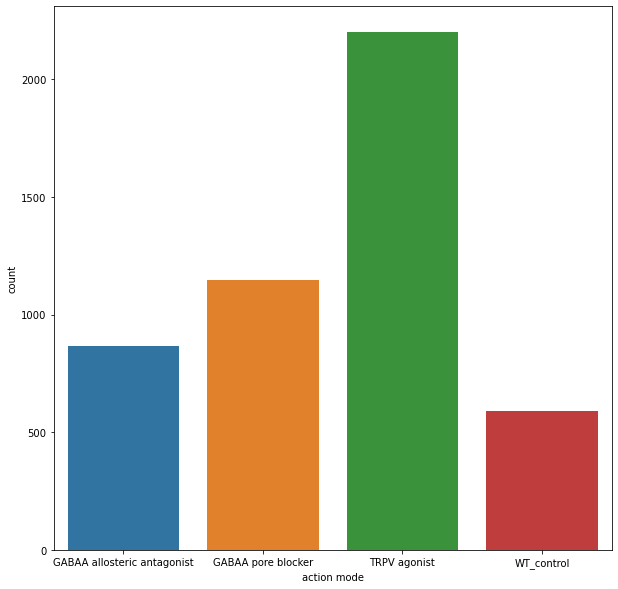

In [5]:
plt.figure(figsize=(10, 10))
sns.countplot(x='action mode', data=data)



In [4]:
#labels
le = LabelEncoder()
Y = le.fit_transform(data['action mode'])
Y

array([0, 0, 0, ..., 3, 3, 3])

In [5]:
class2idx = {
    'GABAA allosteric antagonist':0,
    'GABAA pore blocker':1,
    'TRPV agonist':2,
    'WT_control':3,
}

idx2class = {v: k for k, v in class2idx.items()}

data['action mode'].replace(class2idx, inplace=True)

le.classes_

array(['GABAA allosteric antagonist', 'GABAA pore blocker',
       'TRPV agonist', 'WT_control'], dtype=object)

In [6]:
X = torch.tensor(np.array(X))
Y = torch.tensor(np.array(Y))

In [7]:
print(X.size())
print(Y.size())

torch.Size([4803, 541])
torch.Size([4803])


In [8]:
X[:4000, :].shape

torch.Size([4000, 541])

In [9]:
# Y = Y.reshape(-1, 1)
# Y.shape

In [10]:
#first 4000 for training

X_train = X[:4000, :]
X_test = X[4000:, :]

y_train = Y[:4000]
y_test = Y[4000:] 

In [11]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape torch.Size([4000, 541]) torch.Size([4000])
Testing Shape torch.Size([803, 541]) torch.Size([803])


In [12]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))


X_test_tensors_final = torch.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])) 

In [13]:
X_train_tensors_final = X_train_tensors_final.transpose(1, 2)
X_test_tensors_final = X_test_tensors_final.transpose(1, 2)

# In computer memory: there is no tensor / 2d Matrix or anything, there is only array
# In order to let the computer understand that this is a matrix, we need to tell the computer how to access the elements in the array.
# For example: a matrix size (20, 50) is array that has 1000 elements but we tell the computer that it has 20 rows.

# So tranpose doesn't change the order of the elements in the array, but only the information of row and collumn
# Reshape in some cases can change the order of the elements in the array
# The computation can only be done when the order of the array matches the information of the row/collumns
# So Reshape is sometimes necessary to avoid errors
print("Training Shape", X_train_tensors_final.shape, y_train.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test.shape) 


Training Shape torch.Size([4000, 541, 1]) torch.Size([4000])
Testing Shape torch.Size([803, 541, 1]) torch.Size([803])


In [24]:
# the batch has 4000 sequences, each sequence has 541 timesteps, each timestep has 1 feature
# the "label batch"

class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, hidden_size) #fully connected 1
        self.fc = nn.Linear(hidden_size, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    """
    Forward function of the model.
    We should imagine the size of the tensors in the forward function
    * batch_size: the number of samples to be computed at the same time
    when we have multiple samples, the loss is the sum or average of the loss for each sample.
    batch_size is generally the same throughout one forward pass.
    for example: batch_size of the input is 1000 then batch size  of the output is also 1000.
    -> batch_size is rarely changed during one training step.
    
    * time: how many steps are there for each sample in the data, how long the data is
    - note 1: in your dataset all samples have the same length
    - note 2: in some cases the samples have different lengths > more difficult 
    
    * hidden_size: how many features the data has for every time step
    """
    def forward(self,x):
        """
        inputs: x: torch.Tensor size: [bsz * time * input_hidden_size]
        """
        batch_size = x.size(0)
        # the initial states of the recurrent net: each layer has 1 state h_0 and 1 state c_0
        # each state h_0 has bsz * hidden_size
        h_0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device) #hidden state
        c_0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        #out = self.relu(hn)
        #out = self.fc_1(out) #first Dense
        #out = self.relu(out) #relu
        out = self.fc(hn) #Final Output
        return out
 

In [36]:

learning_rate = 0.001 #0.001 lr

input_size = 1 # 541 #number of features
hidden_size = 50 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 4 #number of output classes 
# when you have label is 1, it actually means that your label is [0 1 0 0]
# if you have label 2 then your label is actually [0 0 1 0]
# in some problems you might have label = [0.1 0.2 0.5 0.2]

In [37]:
model = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [38]:
criterion = torch.nn.CrossEntropyLoss()    # mean-squared error for regression
# cross entropy loss is a dual function that implements softmax and cross-entropy
# the reason is that, when num_classes is huge (>10000) it is faster to make a dual function instead of calling
# nn.LogSoftmax() and torch.nn.NLLLoss() (Negative log-likelihood Loss)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
# back-propagation is the algorithm that we use to train neural networks
# the core idea of BP is dynamic programming = consuming storage (memory) to store intermediate steps
# the large batch size -> the more memory you need -> slow computation
# when you are an architect, you build a new network, you need a small batch size to debug
# in practice, we always use "minibatch - learnin" or "minibatch stochastic gradient descent"
# instead of using the whole dataset, we give the model a minibatch and update the loss
# the idea is that, the statistics of a minibatch can be similar with the dataset
# for example: if your data is 1000 dogs 1000 cats and 2000 birds, then by picking randomly 100 samples, you can have 
# 25 25 50 dogs cats birds -> so the model can still learn

import random

def evaluate():
    
    outputs = model(X_test_tensors_final.float())
    outputs = torch.nn.functional.log_softmax(outputs, dim=-1)
    predictions = torch.argmax(outputs, 1, keepdim=False)
    # predictions = torch.randint(0, 3, y_test.size())
    n_correct = torch.eq(predictions, y_test).int().sum()
    total = y_test.numel()
    
    print(n_correct)
    accuracy = (n_correct.item() / total) * 100
    
    return accuracy


for epoch in range(10000):
    iterable_bsz = 128

    # we select a random 4 elements from the dataset to train the model
    batch_list = list()
    #for i in range(iterable_bsz):
    #    idx = random.randint(0, X_train_tensors_final.size(0) - 1)
    #    batch_list.append(idx)
    batch_list = torch.randint(0, X_train_tensors_final.size(0), (iterable_bsz,))
    # batch_list = torch.LongTensor(batch_list)
    sample = X_train_tensors_final.index_select(0, batch_list)
    label = y_train.index_select(0, batch_list)
    
    outputs = model(sample.float()) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
    loss = criterion(outputs, label)
 
    loss.backward() #calculates the loss of the loss function
 
    optimizer.step() #improve from loss, i.e backprop
    if epoch % 10 == 0:
        accuracy = evaluate()
        print("Epoch: %d, loss: %1.5f, accuracy: %2.6f" % (epoch, loss.item(), accuracy))
        
# AFTER TRAINING:

# store the weights of model to a dictionary 
model_weights = model.state_dict()

torch.save("model.pt", model_weights)

# FOR LOADING THE MODEL:
# You need to build the model again
#model = LSTM1(.....)

weights = torch.load("model.pt")
model.load_state_dict(weights)


tensor(589)
Epoch: 0, loss: 1.41176, accuracy: 73.349938
tensor(214)
Epoch: 10, loss: 1.33313, accuracy: 26.650062
tensor(214)
Epoch: 20, loss: 1.26960, accuracy: 26.650062
tensor(214)
Epoch: 30, loss: 1.04679, accuracy: 26.650062
tensor(214)
Epoch: 40, loss: 1.07291, accuracy: 26.650062


KeyboardInterrupt: 